In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import helpers as h

In [2]:
encryption_methods = h.encryption_methods
early_window_ms = 30
path = "../avg_power_consumptions/power_consumption_"
fig_path = os.path.join("..", "figures", "power_consumption")
dfs = {}
for encryption in encryption_methods:
    dfs[encryption] = pd.read_csv(path + encryption + "_" + str(early_window_ms) + ".csv")

In [3]:
def plot_bar_results(means, stds, x_label, y_label, title, scenarios=(1,12)):

    scens = [f"Scen {i}" for i in range(scenarios[0], scenarios[1] + 1)]

    x = np.arange(scenarios[1]-scenarios[0]+1)  # positions for groups
    width = 1 / (len(encryption_methods) + 1)  # width of each bar

    # Create plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot each method
    for i in range(len(encryption_methods)):
        ax.bar(x + i * width,
               means[i],
               width,
               yerr=stds[i],
               label=encryption_methods[i],
               capsize=5)

    # Labels and ticks
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x + width)
    ax.set_xticklabels(scens)
    ax.legend()

    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    return fig, ax

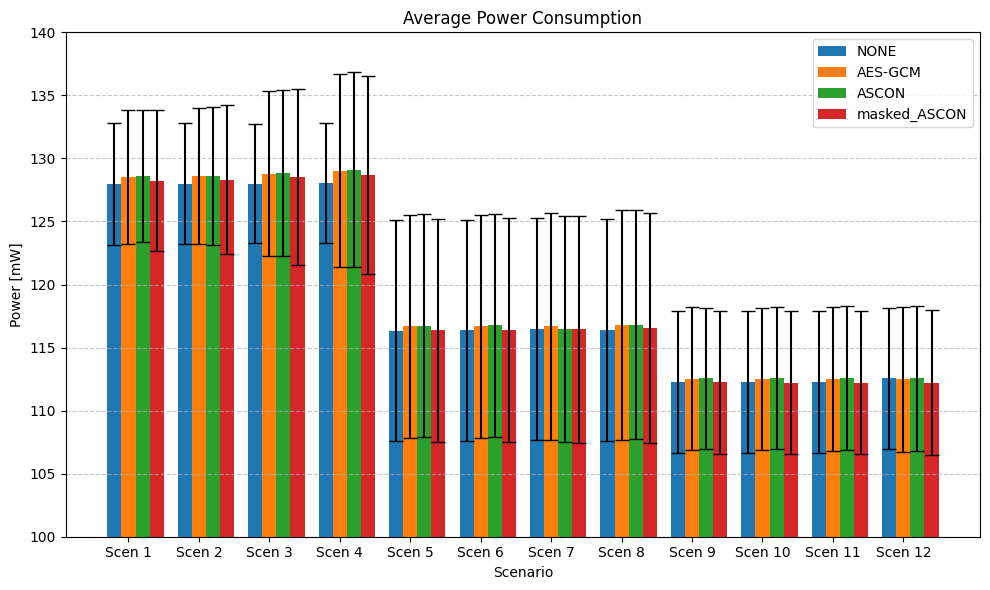

In [4]:
means = []
stds = []

for encryption in encryption_methods:
    # Get the means and stds
    means.append(dfs[encryption]["All periods power [mW]"].apply(
        lambda x: float(x.split("±")[0])).to_numpy())
    stds.append(dfs[encryption]["All periods power [mW]"].apply(
        lambda x: float(x.split("±")[1])).to_numpy())

fig, ax = plot_bar_results(means,
                           stds,
                           "Scenario",
                           "Power [mW]",
                           "Average Power Consumption",
                           scenarios=(1, 12))
ax.set_ylim(100,140)

plt.savefig(
    fig_path+ "/avg_power.png",
    dpi=300,
    bbox_inches="tight",
)

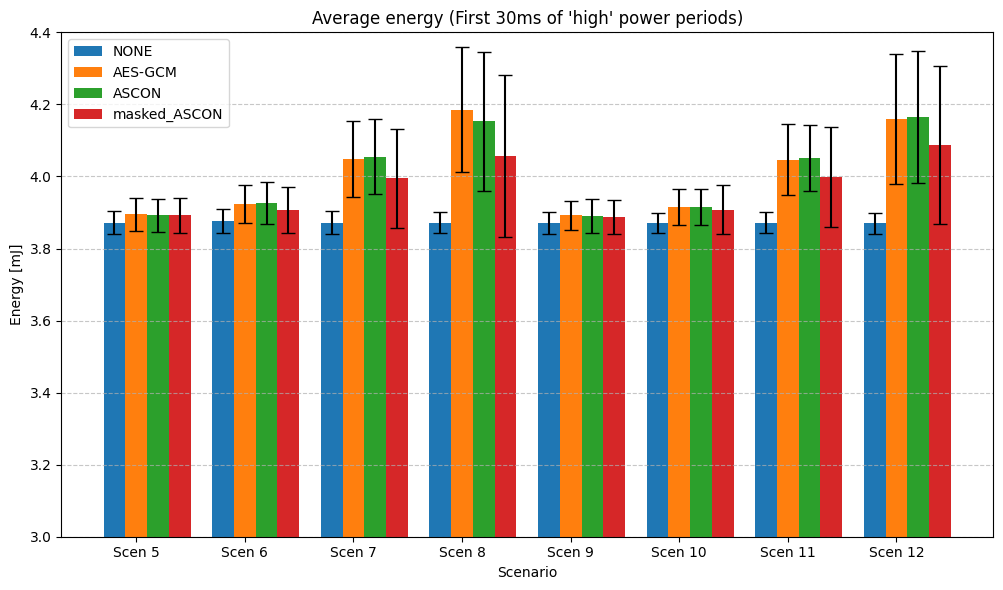

In [5]:
early_window_ms = 30

dfs = {}
for encryption in encryption_methods:
    dfs[encryption] = pd.read_csv(path + encryption + "_" + str(early_window_ms) + ".csv")


means = []
stds = []

for encryption in encryption_methods:
    # Get the means and stds
    means.append(dfs[encryption].iloc[4::][f"First {early_window_ms}ms [mJ]"].apply(
        lambda x: float(x.split("±")[0])).to_numpy())
    stds.append(dfs[encryption].iloc[4::][f"First {early_window_ms}ms [mJ]"].apply(
        lambda x: float(x.split("±")[1])).to_numpy())

fig, ax = plot_bar_results(
    means,
    stds,
    "Scenario",
    "Energy [mJ]",
    f"Average energy (First {early_window_ms}ms of 'high' power periods)",
    scenarios=(5, 12))

ax.set_ylim(3,4.4)

plt.savefig(
    fig_path+ f"/avg_energy_{early_window_ms}ms.png",
    dpi=300,
    bbox_inches="tight",
)

# None --> AES-GCM -->ASCON --> Masked ASCON

In [6]:
early_window_ms = 35

dfs = {}
for encryption in encryption_methods:
    dfs[encryption] = pd.read_csv(path + encryption + "_" + str(early_window_ms) + ".csv")


means = []
stds = []

for encryption in encryption_methods:
    # Get the means and stds
    means.append(dfs[encryption].iloc[4::][f"First {early_window_ms}ms [mJ]"].apply(
        lambda x: float(x.split("±")[0])).to_numpy())
    stds.append(dfs[encryption].iloc[4::][f"First {early_window_ms}ms [mJ]"].apply(
        lambda x: float(x.split("±")[1])).to_numpy())

fig, ax = plot_bar_results(
    means,
    stds,
    "Scenario",
    "Energy [mJ]",
    f"Average energy (First {early_window_ms}ms of 'high' power periods)",
    scenarios=(5, 12))

ax.set_ylim(3.8,4.4)

plt.savefig(
    fig_path+ f"/avg_energy_{early_window_ms}ms.png",
    dpi=300,
    bbox_inches="tight",
)

FileNotFoundError: [Errno 2] No such file or directory: '../avg_power_consumptions/power_consumption_masked_ASCON_35.csv'

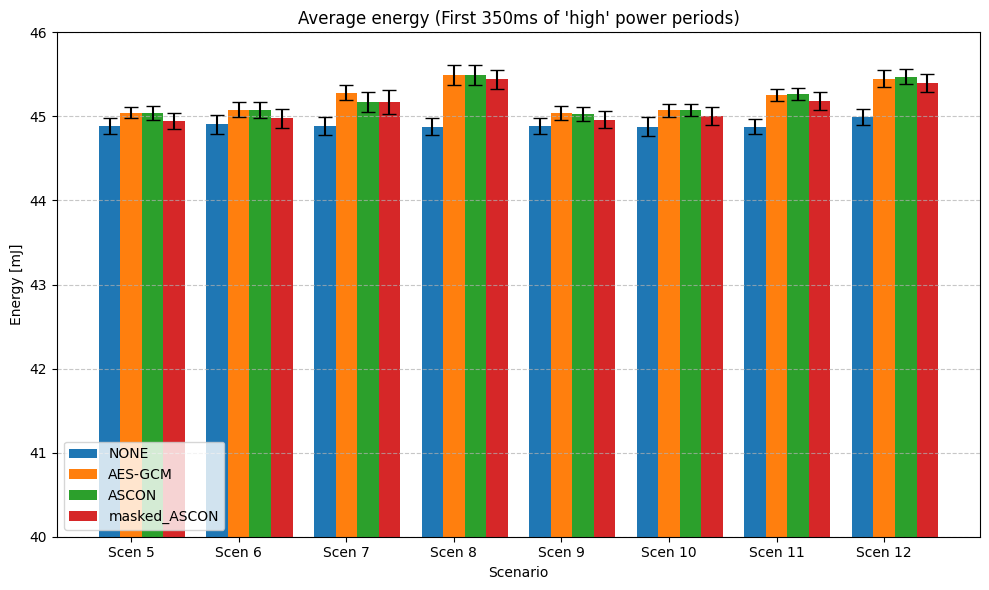

In [ ]:
early_window_ms = 350

dfs = {}
for encryption in encryption_methods:
    dfs[encryption] = pd.read_csv(path + encryption + "_" + str(early_window_ms) + ".csv")


means = []
stds = []

for encryption in encryption_methods:
    # Get the means and stds
    means.append(dfs[encryption].iloc[4::][f"First {early_window_ms}ms [mJ]"].apply(
        lambda x: float(x.split("±")[0])).to_numpy())
    stds.append(dfs[encryption].iloc[4::][f"First {early_window_ms}ms [mJ]"].apply(
        lambda x: float(x.split("±")[1])).to_numpy())

fig, ax = plot_bar_results(
    means,
    stds,
    "Scenario",
    "Energy [mJ]",
    f"Average energy (First {early_window_ms}ms of 'high' power periods)",
    scenarios=(5, 12))

ax.set_ylim(40,46)

plt.savefig(
    fig_path+ f"/avg_energy_{early_window_ms}ms.png",
    dpi=300,
    bbox_inches="tight",
)

In [48]:
early_window_ms = 350

dfs = {}

for encryption in encryption_methods:
    dfs[encryption] = pd.read_csv(path + encryption + "_" + str(early_window_ms) + ".csv")


def restructure_dfs(dfs, out_path):
    cols = dfs["ASCON"].columns
    index = dfs["ASCON"]["Scenario"]
    for col in cols[1::]:
        result = {}
        for encryption_method in dfs.keys():
            if col == "All periods power [mW]":
                result[encryption_method] = dfs[encryption_method][col]
            else:
                result[encryption_method] = dfs[encryption_method][col].iloc[
                    4::]

        if col == "All periods power [mW]":
            result = pd.DataFrame(result)
            result.set_index(index, inplace=True)
        else:
            result = pd.DataFrame(result)
            result.set_index(index[4::], inplace=True)
        # Order the columns
        result = result.reindex(
            columns=["NONE", "AES-GCM", "ASCON", "masked_ASCON"])
        print(result)
        path = os.path.join(out_path, col)
        result.to_csv(path + ".csv", index=True)

In [49]:
out_path = os.path.join("..", "avg_power_consumptions", "restructured")
restructure_dfs(dfs, out_path)

                      NONE           AES-GCM             ASCON  \
Scenario                                                         
scen_5    374.846 ± 19.940  379.464 ± 19.371  380.025 ± 19.571   
scen_6    377.202 ± 24.383  377.458 ± 21.568  381.387 ± 20.724   
scen_7    381.339 ± 31.252  378.489 ± 21.249  380.145 ± 29.290   
scen_8    377.517 ± 22.187  383.685 ± 19.795  385.331 ± 15.778   
scen_9    376.452 ± 18.628  376.819 ± 23.760  383.901 ± 24.248   
scen_10   375.985 ± 20.131  374.169 ± 21.123  378.000 ± 18.120   
scen_11   376.244 ± 20.225  381.780 ± 17.111  382.101 ± 17.355   
scen_12   382.845 ± 17.391  378.055 ± 22.036  376.211 ± 21.426   

              masked_ASCON  
Scenario                    
scen_5    377.995 ± 18.486  
scen_6    380.166 ± 20.180  
scen_7    381.294 ± 18.102  
scen_8    381.723 ± 16.561  
scen_9    380.107 ± 17.132  
scen_10   377.254 ± 18.245  
scen_11   380.337 ± 17.495  
scen_12   380.224 ± 17.279  
                 NONE      AES-GCM        ASCON m